In [33]:
import pandas as pd
import seaborn as sns
from mido import MidiFile
from music21 import converter, corpus, instrument, midi, note, chord, pitch, converter, interval
import os
from helper_functions import get_file_and_dirnames
from analysis_functions import analyse_data_folder
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

PATH_MELODY_EXTRACTED = "../data/3_melody_sets"
PATH_TRANSPOSED = "../data/4_transposed_sets"

if not os.path.exists(PATH_TRANSPOSED):
    os.makedirs(PATH_TRANSPOSED)

In [34]:
dir = "17_POP909-Dataset-master"
if not os.path.exists(f"{PATH_TRANSPOSED}/{dir}"):
    os.makedirs(f"{PATH_TRANSPOSED}/{dir}")

files,_ = get_file_and_dirnames(f"{PATH_MELODY_EXTRACTED}/{dir}")
files.sort()
files

['001.mid',
 '002.mid',
 '003.mid',
 '004.mid',
 '005.mid',
 '006.mid',
 '007.mid',
 '008.mid',
 '009.mid',
 '010.mid',
 '011.mid',
 '012.mid',
 '013.mid',
 '014.mid',
 '015.mid',
 '016.mid',
 '017.mid',
 '018.mid',
 '019.mid',
 '020.mid',
 '021.mid',
 '022.mid',
 '023.mid',
 '024.mid',
 '025.mid',
 '026.mid',
 '027.mid',
 '028.mid',
 '029.mid',
 '030.mid',
 '031.mid',
 '032.mid',
 '033.mid',
 '034.mid',
 '035.mid',
 '036.mid',
 '037.mid',
 '038.mid',
 '039.mid',
 '040.mid',
 '041.mid',
 '042.mid',
 '043.mid',
 '044.mid',
 '045.mid',
 '046.mid',
 '047.mid',
 '048.mid',
 '049.mid',
 '050.mid',
 '051.mid',
 '052.mid',
 '053.mid',
 '054.mid',
 '055.mid',
 '056.mid',
 '057.mid',
 '058.mid',
 '059.mid',
 '060.mid',
 '061.mid',
 '062.mid',
 '063.mid',
 '064.mid',
 '065.mid',
 '066.mid',
 '067.mid',
 '068.mid',
 '069.mid',
 '070.mid',
 '071.mid',
 '072.mid',
 '073.mid',
 '074.mid',
 '075.mid',
 '076.mid',
 '077.mid',
 '078.mid',
 '079.mid',
 '080.mid',
 '081.mid',
 '082.mid',
 '083.mid',
 '08

In [35]:
def transpose_to_Cmaj_Amin(score):
    music_analysis = midi_score.analyze('key')
    if music_analysis.mode == "major":
        i = interval.Interval(music_analysis.tonic, pitch.Pitch('C'))
    elif music_analysis.mode == "minor":
        i = interval.Interval(music_analysis.tonic, pitch.Pitch('A'))
    else:
        return "unknown scale"
    transposed_score = midi_score.transpose(i)
    return transposed_score

In [37]:
df = pd.DataFrame()
for f in tqdm(files):
    if f[-4:] != ".mid":
        continue
    midi_score = converter.parse(f"{PATH_MELODY_EXTRACTED}/{dir}/{f}")
    time_signatures = midi_score.getTimeSignatures()
    music_analysis = midi_score.analyze('key')
    row = {
        "name": f,
        "time_signatures": len(time_signatures),
        "1st_time_signature": (time_signatures[0].beatCount, time_signatures[0].denominator),
        "key": music_analysis,
        "confidence": music_analysis.correlationCoefficient
    }
    df = df.append(row, ignore_index=True)
df

100%|██████████| 909/909 [02:02<00:00,  7.45it/s]


,name,time_signatures,1st_time_signature,key,confidence
0,001.mid,1,"(2, 4)",e- minor,0.700328
1,002.mid,1,"(2, 4)",B major,0.906810
2,003.mid,1,"(2, 4)",g minor,0.829662
3,004.mid,1,"(2, 4)",e- minor,0.955601
4,005.mid,1,"(2, 4)",G major,0.886998
...,...,...,...,...,...
904,905.mid,1,"(1, 4)",C major,0.887937
905,906.mid,1,"(1, 4)",D major,0.876909
906,907.mid,1,"(1, 4)",E- major,0.900670
907,908.mid,1,"(1, 4)",b- minor,0.849552


In [ ]:
skipped = []
for f in tqdm(files):
    if f[-4:] != ".mid":
        continue
    midi_score = converter.parse(f"{PATH_MELODY_EXTRACTED}/{dir}/{f}")

    timeSignatures = midi_score.getTimeSignatures()
    if len(timeSignatures) > 1:
        print(f, "skipped multiple timesignatures")
        skipped.append(f)
        continue
    if timeSignatures[0].denominator != 4:
        print(f, "skipped denominator not 4")
        skipped.append(f)
        continue

    music_analysis = midi_score.analyze('key')
    if music_analysis.correlationCoefficient < 0.75:
        print(f, "skipped key confidence too low")
        skipped.append(f)
        continue

    transposed = transpose_to_Cmaj_Amin(midi_score)
    transposed.write("midi", fp=f"{PATH_TRANSPOSED}/{dir}/{f}")

In [3]:
d = "17_POP909-Dataset-master"
df = analyse_data_folder(f"{PATH_MELODY_EXTRACTED}/{d}", compute_metrics=False)
df

100%|██████████| 909/909 [05:57<00:00,  2.55it/s]


,name,type,length_sec,ticks_per_beat,track_count,numerator,denominator,clocks_per_click,notated_32nd_notes_per_beat,key,...,vel_lowest,vel_highest,vel_avg,vel_same,duration_lowest,duration_highest,duration_avg,monophonic,overlap,error
0,202.mid,1,178.45,480,2,2.0,4.0,24.0,8.0,0,...,66.0,109.0,98.0,False,0.002083,16.750000,0.620735,True,False,False
1,564.mid,1,245.41,480,2,4.0,4.0,24.0,8.0,0,...,90.0,119.0,109.0,False,0.004167,38.122917,0.431743,True,True,False
2,570.mid,1,254.67,480,2,4.0,4.0,24.0,8.0,0,...,71.0,123.0,108.0,False,0.002083,31.168750,0.338517,True,True,False
3,216.mid,1,252.54,480,2,4.0,4.0,24.0,8.0,0,...,59.0,116.0,97.0,False,0.002083,51.420833,0.639264,True,True,False
4,558.mid,1,232.58,480,2,4.0,4.0,24.0,8.0,0,...,94.0,120.0,115.0,False,0.002083,37.445833,0.319527,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,541.mid,1,276.44,480,2,1.0,4.0,24.0,8.0,0,...,65.0,88.0,79.0,False,0.002083,40.508333,0.829061,True,True,False
905,227.mid,1,251.93,480,2,4.0,4.0,24.0,8.0,C,...,53.0,99.0,84.0,False,0.008333,4.008333,0.381320,False,True,False
906,569.mid,1,245.85,480,2,4.0,4.0,24.0,8.0,0,...,88.0,120.0,111.0,False,0.004167,59.437500,0.684477,True,True,False
907,596.mid,1,276.68,480,2,1.0,4.0,24.0,8.0,0,...,49.0,127.0,99.0,False,0.004167,29.231250,0.517375,True,True,False


In [18]:
col_same_value = []
for column in df.columns:
    if len(df[column].unique()) == 1:
        col_same_value.append(column)
        print(column)
        print(df[column].unique())
        print()
print(col_same_value)
df = df.drop(columns = col_same_value)

type
[1]

ticks_per_beat
[480]

track_count
[2]

clocks_per_click
[24.]

notated_32nd_notes_per_beat
[8.]

error
[False]

['type', 'ticks_per_beat', 'track_count', 'clocks_per_click', 'notated_32nd_notes_per_beat', 'error']


<AxesSubplot: >

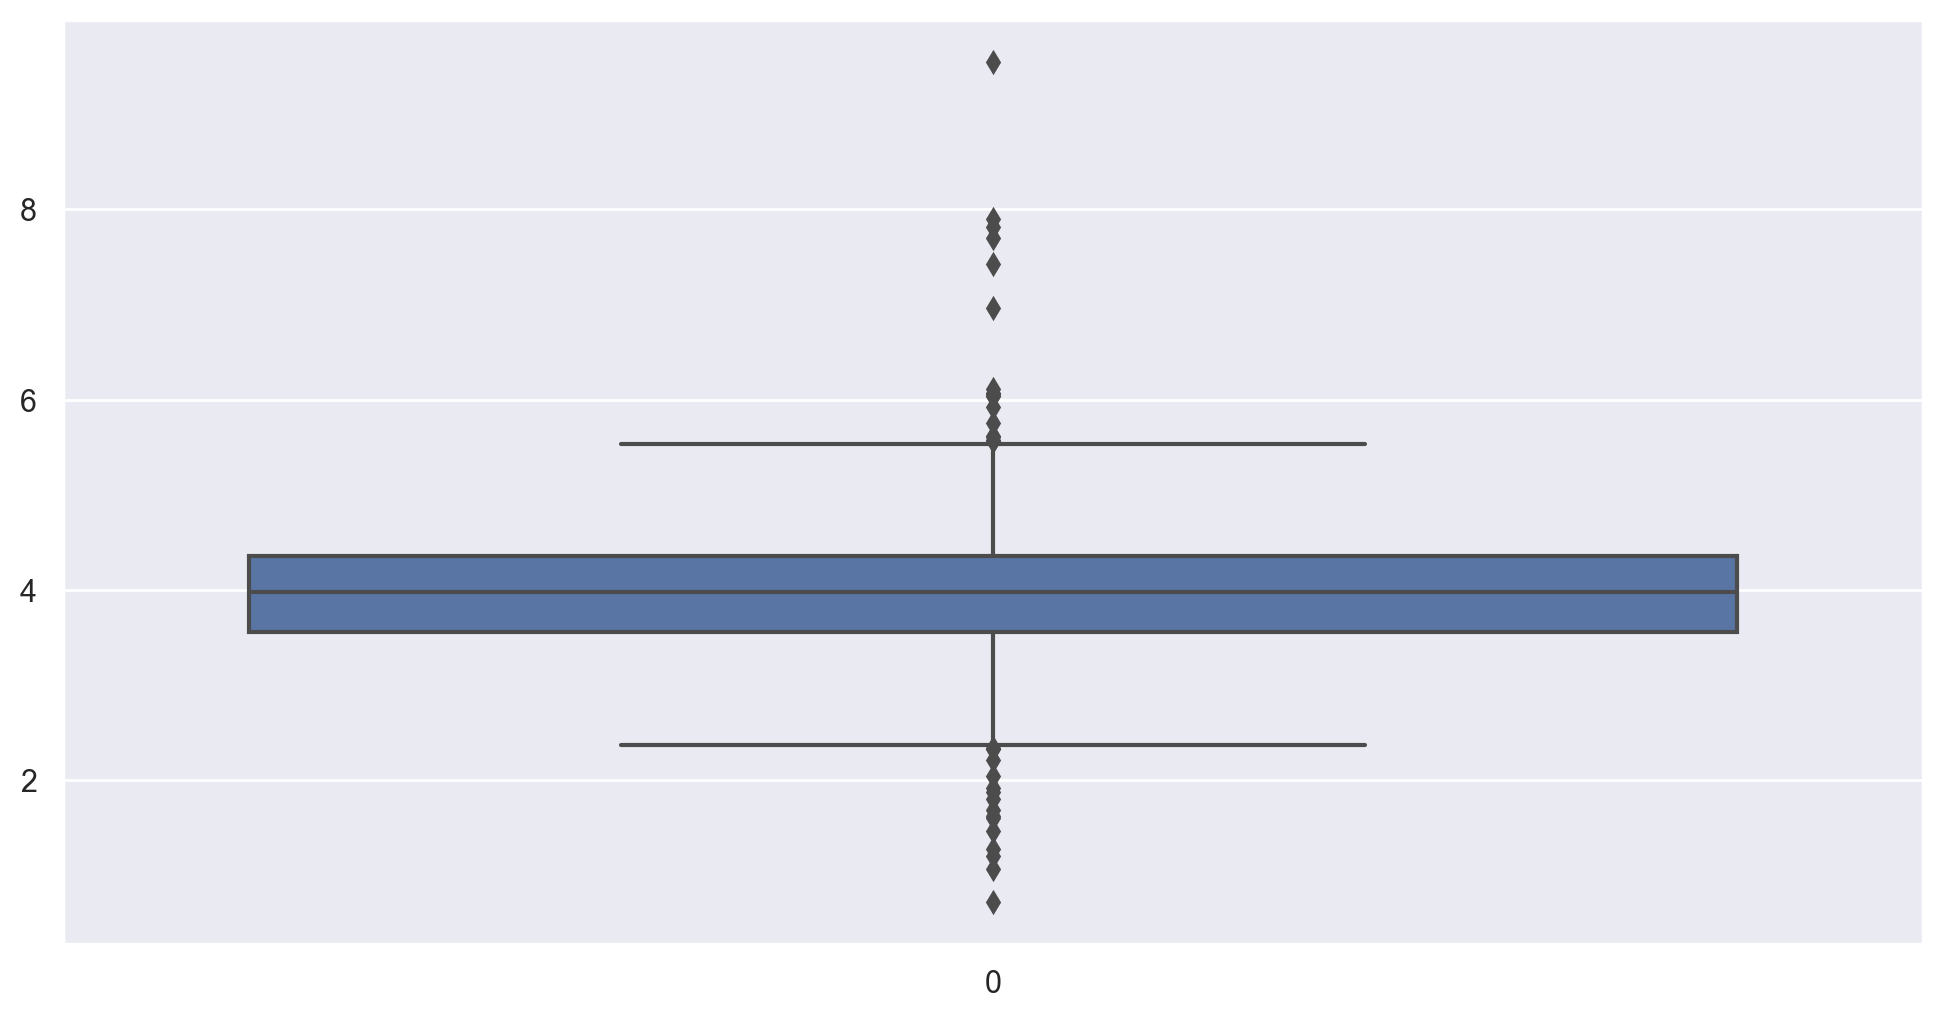

In [41]:
sns.set(rc={'figure.figsize':(12,6)})

sns.boxplot(df["length_sec"]/60)

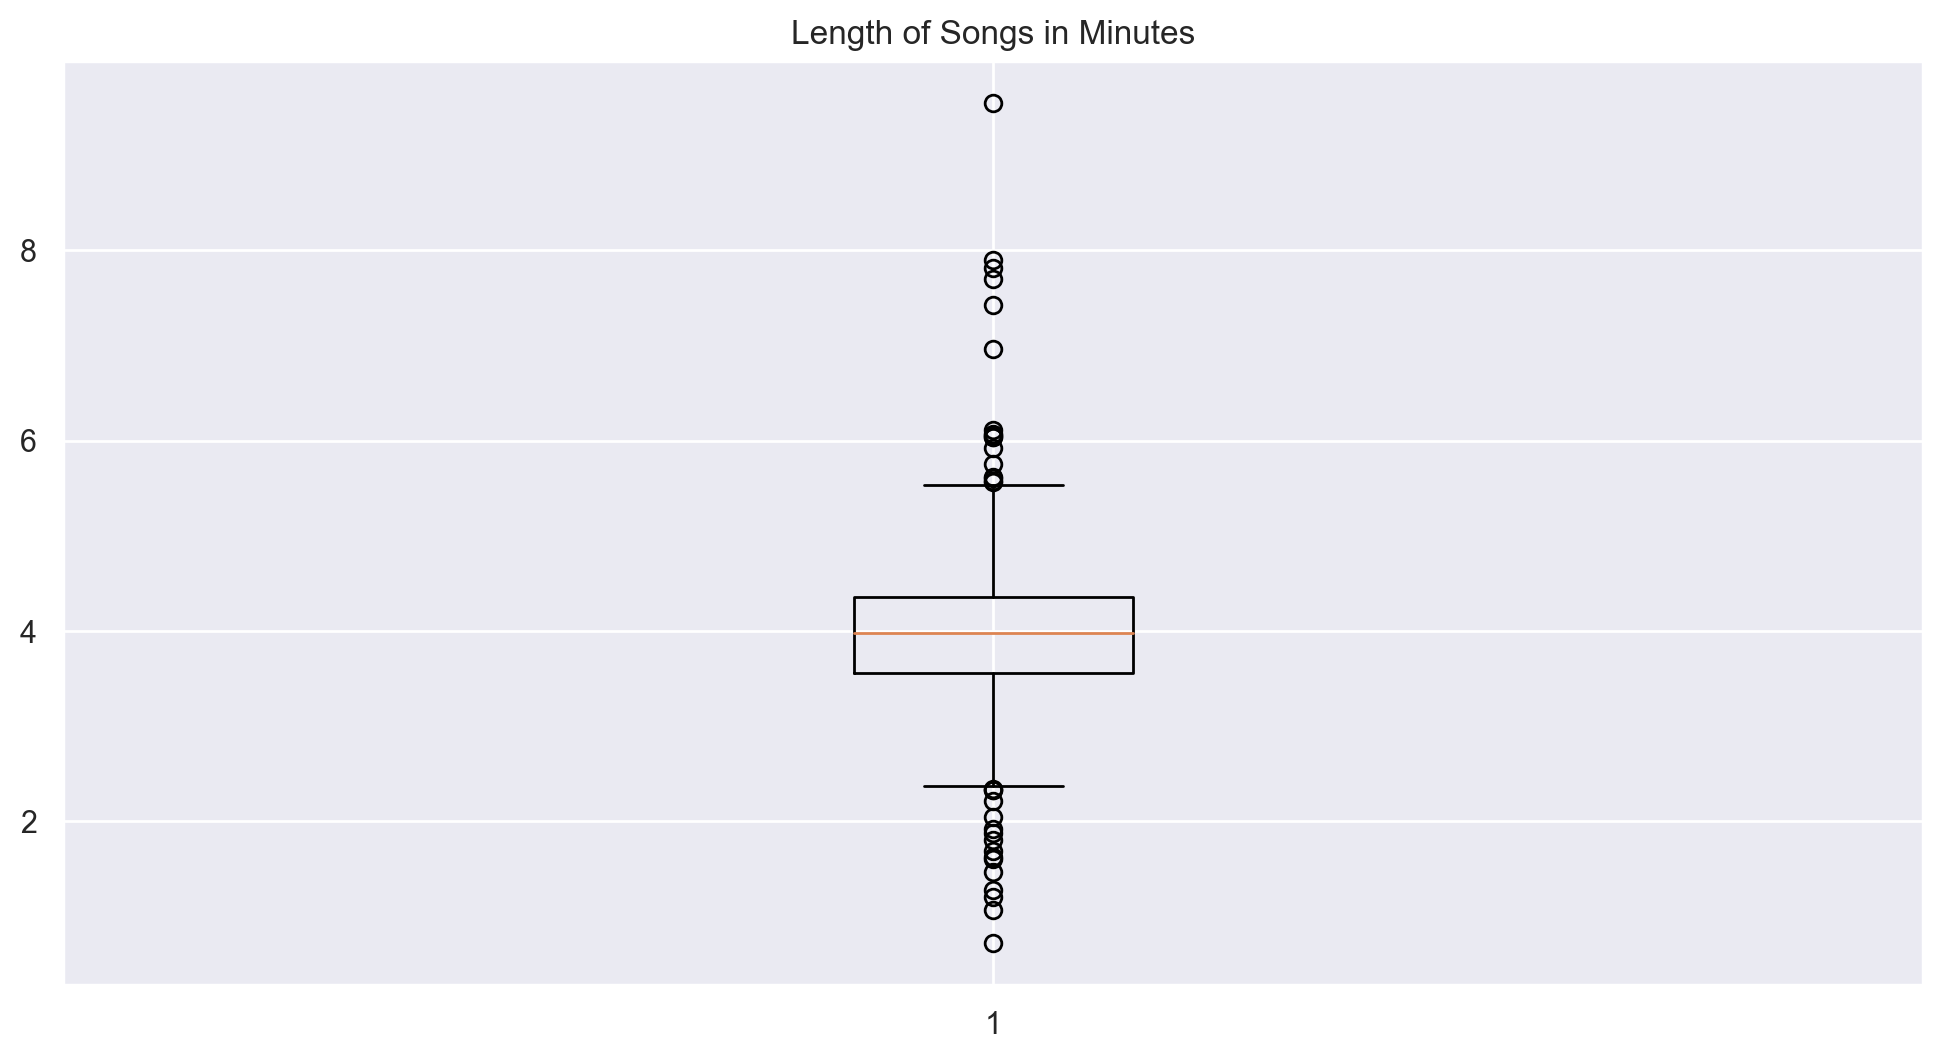

In [40]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

#ax.plot(y, color='blue', label='Sine wave')
#ax.plot(z, color='black', label='Cosine wave')
ax.boxplot(df["length_sec"]/60)
ax.set_title("Length of Songs in Minutes")
#ax.set_xlabel('Time')
#ax.set_ylabel('Intensity')
#leg = ax.legend()

plt.show()

In [45]:
df[df["denominator"] != 4]

,name,length_sec,numerator,denominator,key,tempo,bpm,note_lowest,note_highest,note_avg,note_variation_count,vel_lowest,vel_highest,vel_avg,vel_same,duration_lowest,duration_highest,duration_avg,monophonic,overlap
47,203.mid,220.01,6.0,8.0,0,500000.0,120,59.0,91.0,76.0,20,45.0,114.0,92.0,False,0.002083,49.139583,0.605064,True,True
50,215.mid,224.49,6.0,8.0,0,468750.0,128,68.0,85.0,77.0,13,59.0,108.0,88.0,False,0.002083,60.833333,0.515235,True,True
413,254.mid,235.35,6.0,8.0,0,550459.0,109,66.0,89.0,77.0,22,63.0,103.0,85.0,False,0.008333,30.989583,0.664840,True,True
791,231.mid,189.48,6.0,8.0,0,555555.0,108,66.0,81.0,74.0,8,46.0,105.0,81.0,False,0.002083,54.647917,0.474348,True,True
817,350.mid,225.83,6.0,8.0,0,952381.0,63,57.0,81.0,71.0,18,100.0,120.0,115.0,False,0.002083,21.404167,0.264639,True,True


In [48]:
eliminate_midis = []
eliminate_midis.extend(df[df["denominator"] != 4]["name"].to_list())
eliminate_midis

['203.mid', '215.mid', '254.mid', '231.mid', '350.mid']

In [69]:
df.groupby("numerator").count()

,name,length_sec,denominator,key,tempo,bpm,note_lowest,note_highest,note_avg,note_variation_count,vel_lowest,vel_highest,vel_avg,vel_same,duration_lowest,duration_highest,duration_avg,monophonic,overlap
numerator,,,,,,,,,,,,,,,,,,,
1.0,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617
2.0,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
3.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4.0,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264
6.0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [57]:
midi_score = converter.parse(f"{PATH_MELODY_EXTRACTED}/{dir}/{files[111]}")
midi_score

<music21.stream.Score 0x7ff691fb9430>

In [7]:
timeSignature = midi_score.getTimeSignatures()[0]
music_analysis = midi_score.analyze('key')
print("File:", files[111])
print("Music time signature: {0}/{1}".format(timeSignature.beatCount, timeSignature.denominator))
print("Expected music key: {0}".format(music_analysis))
print("Music key confidence: {0}".format(music_analysis.correlationCoefficient))
print("Other music key alternatives:")
for analysis in music_analysis.alternateInterpretations:
    if (analysis.correlationCoefficient > 0.5):
        print(analysis)

File: 112.mid
Music time signature: 1/4
Expected music key: C major
Music key confidence: 0.9503316646588839
Other music key alternatives:
d minor
a minor
F major


In [54]:
transposed_score = transpose_to_Cmaj_Amin(midi_score)
transposed_score.write("midi", fp=f"{PATH_TRANSPOSED}/{dir}/test.mid")

'../data/4_transposed_sets/17_POP909-Dataset-master/test.mid'